In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-03-01 03:03:34.035227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Load your data
df = pd.read_csv('sorted_ntc.csv')  # Replace with your file
print(df.head())


    Open   High    Low    Ltp  per_change      Qty    Turnover
0  867.0  874.0  860.0  868.9        0.22  16920.0  14698672.3
1  875.9  900.0  869.0  870.0        0.13  19150.0  16772332.6
2  870.0  876.0  860.1  867.9       -0.24  23071.0  20013153.3
3  882.0  882.0  864.6  875.0        0.82  24999.0  21740095.0
4  875.0  910.0  873.9  878.0        0.34  22068.0  19437362.3


In [6]:
# Ensure all 6 columns are present (adjust if needed)
feature_columns = ['Open', 'High', 'Low', 'Ltp', 'per_change', 'Qty']  # Your 8 features
data = df[feature_columns].values

In [7]:
# Scale all 8 features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [8]:
# Sequence creation function
def create_sequences_multivariate(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])   # n_steps timesteps, each with 8 features
        y.append(data[i+n_steps])      # Predict all 8 features at next step
    return np.array(X), np.array(y)

In [9]:
# Parameters
n_steps = 60  # Past 60 days used for prediction


In [11]:
# Create sequences
X, y = create_sequences_multivariate(scaled_data, n_steps)

In [12]:
# Train-test split
split = int(len(X) * 0.9)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# # Define Bidirectional LSTM model
# model = Sequential([
#     LSTM(64, activation='tanh', return_sequences=True, input_shape=(n_steps, 6)),
#     Dropout(0.2),
#     LSTM(128, activation='tanh', return_sequences=True),
#     Dropout(0.3),
#     LSTM(64, activation='tanh', return_sequences=True),
#     Dropout(0.3),
#     LSTM(32, activation='tanh', return_sequences=False),
#     Dropout(0.2),
#     Dense(6)
    
# ])
# # model.add(LSTM(128, return_sequences=True), input_shape=(n_steps, 8))
# # model.add(Dropout(0.3))
# # model.add(Bidirectional(LSTM(64, return_sequences=False)))
# # model.add(Dropout(0.3))
# # model.add(Dense(8))  # Predict all 8 features at once

In [ ]:
# model.compile(optimizer='adam', loss='mse')

In [ ]:
# # Callbacks
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
# ]


In [ ]:
# # Train the model
# history = model.fit(X_train, y_train,
#                     validation_split=0.2,
#                     epochs=100,
#                     batch_size=64,
#                     callbacks=callbacks)

Epoch 1/100
21/21 [==============================] - 8s 169ms/step - loss: 0.0412 - val_loss: 0.0089 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - 3s 121ms/step - loss: 0.0161 - val_loss: 0.0091 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - 3s 136ms/step - loss: 0.0140 - val_loss: 0.0065 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - 3s 143ms/step - loss: 0.0119 - val_loss: 0.0064 - lr: 0.0010
Epoch 5/100
21/21 [==============================] - 3s 122ms/step - loss: 0.0116 - val_loss: 0.0063 - lr: 0.0010
Epoch 6/100
21/21 [==============================] - 3s 122ms/step - loss: 0.0109 - val_loss: 0.0086 - lr: 0.0010
Epoch 7/100
21/21 [==============================] - 3s 121ms/step - loss: 0.0112 - val_loss: 0.0069 - lr: 0.0010
Epoch 8/100
21/21 [==============================] - 3s 127ms/step - loss: 0.0095 - val_loss: 0.0058 - lr: 0.0010
Epoch 9/100
21/21 [==============================] - 3s 126ms/step - loss: 0.0090 - val_

In [ ]:
# model.save('final_model_60_noEps.keras')

In [ ]:
# model.summary()

In [13]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
model = load_model('final_model_60_noEps.keras')

In [ ]:

# # Plot training & validation loss
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.show()

NameError: name 'history' is not defined

<Figure size 1200x600 with 0 Axes>

In [15]:
## for the X_train
train_result=model.predict(X_train)
train_result_inverse=scaler.inverse_transform(train_result)
train_result_close=train_result_inverse[:, 3]


6/6 [==============================] - 1s 27ms/step


In [16]:
## for the X_test
test_result=model.predict(X_test)
test_result_inverse=scaler.inverse_transform(test_result)
test_result_close=test_result_inverse[:, 3]


1/1 [==============================] - 0s 41ms/step


In [17]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
print("MAE of close:", mean_absolute_error(y_test[:,3], test_result[:,3]))
print("R² Score of close:", r2_score(y_test[:,3], test_result[:,3]))
print("MSE of close:", mean_squared_error(y_test[:,3], test_result[:,3]))
print("MAPE of close:", mean_absolute_percentage_error(y_test[:,3], test_result[:,3]))


MAE of close: 0.07272039373774908
R² Score of close: -2.520234694556083
MSE of close: 0.006685272268608638
MAPE of close: 0.23666269571356258


In [18]:
print("MAE of Test:", mean_absolute_error(y_test, test_result))
print("R² Score TESt:", r2_score(y_test, test_result))
print("MSE TESt:", mean_squared_error(y_test, test_result))
print("MAPE of Test:", mean_absolute_percentage_error(y_test, test_result))

MAE of Test: 0.07160225468946319
R² Score TESt: -2.3190913506628124
MSE TESt: 0.00769909287156575
MAPE of Test: 0.30950680398665503


In [19]:
print("MAE of Train:", mean_absolute_error(y_train, train_result))
print("R² Score Train:", r2_score(y_train, train_result))
print("MSE Train:", mean_squared_error(y_train, train_result))
print("MAPE of Train:", mean_absolute_percentage_error(y_train, train_result))

MAE of Train: 0.08739162079752986
R² Score Train: 0.34099114323577645
MSE Train: 0.014186653671873063
MAPE of Train: 1216502621581.764


In [20]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((19, 60, 6), (171, 60, 6), (19, 6), (171, 6))

In [21]:
# Function to predict future days recursively (all 8 features)
def predict_future_multivariate(model, data, scaler, n_steps, future_days):
    predicted = []
    current_sequence = data[-n_steps:]  # Last window of data

    for _ in range(future_days):
        prediction = model.predict(current_sequence.reshape(1, n_steps, 6), verbose=0)
        predicted.append(prediction[0])

        # Append predicted row to current sequence for next prediction
        current_sequence = np.vstack([current_sequence[1:], prediction])

    # Inverse transform all predicted data (8 features)
    predicted_array = np.array(predicted)
    predicted_prices = scaler.inverse_transform(predicted_array)
    return predicted_prices

In [22]:
# Predict next 30 days
future_days = 150
future_prices = predict_future_multivariate(model, scaled_data, scaler, n_steps, future_days)

In [25]:
# Plot actual vs future Close prices
actual_close_prices = df['Ltp'].values

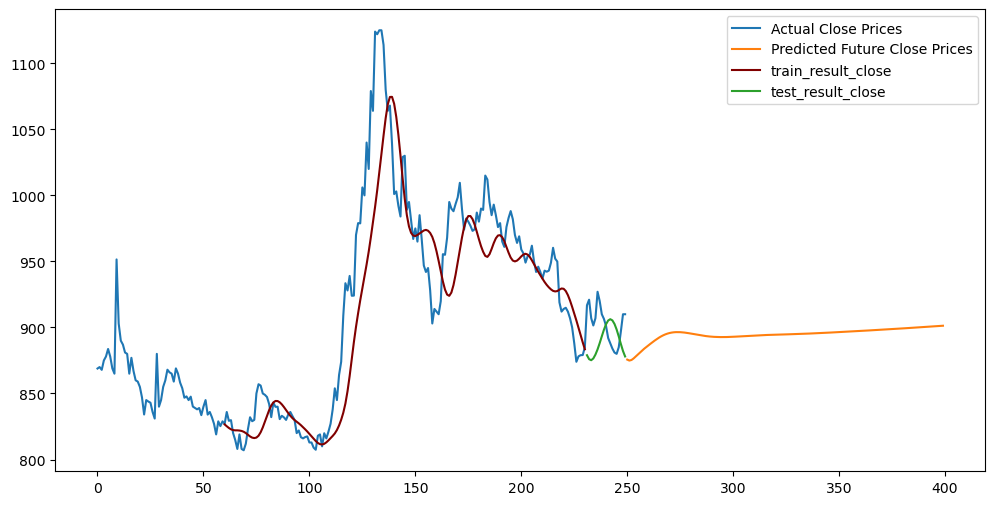

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(actual_close_prices, label='Actual Close Prices')
plt.plot(range(len(actual_close_prices), len(actual_close_prices) + future_days), future_prices[:, 3], label='Predicted Future Close Prices')
plt.plot(range(n_steps, len(train_result_close)+n_steps),train_result_close,label="train_result_close", color="maroon" )
plt.plot(range(len(train_result_close)+n_steps, len(train_result_close)+len(test_result_close)+n_steps),test_result_close,label="test_result_close" )
plt.legend()
plt.savefig("close_pred_future.png")
plt.show()

In [27]:
# Print predicted future prices (all features for each day)
future_df = pd.DataFrame(future_prices, columns=feature_columns)
print(future_df)

           Open        High         Low         Ltp  per_change           Qty
0    878.351685  903.293945  872.695801  875.670776    1.756586   7509.707520
1    877.499878  902.624573  872.168396  874.917725    1.769450   7676.427246
2    877.947144  903.430115  872.770447  875.355835    1.795517   8476.893555
3    879.189941  905.075439  874.019714  876.514465    1.829770   9640.442383
4    880.802612  907.055237  875.533386  878.007507    1.867567  10950.402344
..          ...         ...         ...         ...         ...           ...
145  904.236877  934.173401  897.848694  900.854614    1.882254  26943.976562
146  904.355286  934.311768  897.957520  900.963867    1.882369  26975.880859
147  904.474121  934.450684  898.066711  901.073608    1.882482  27007.697266
148  904.593384  934.590210  898.176392  901.183655    1.882593  27039.443359
149  904.713196  934.730225  898.286438  901.294250    1.882703  27071.093750

[150 rows x 6 columns]


In [28]:
# Save to CSV if needed
future_df.to_csv('predicted_future_prices_withoutEPS.csv', index=False)